#   Gaussian Mixture Models- GMM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import  metrics

In [24]:
df=pd.read_csv('USArrests.csv')
df= df.drop(columns="Unnamed: 0")

In [25]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [29]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [34]:
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

clusters = gmm_cluster.fit_predict(df_std)

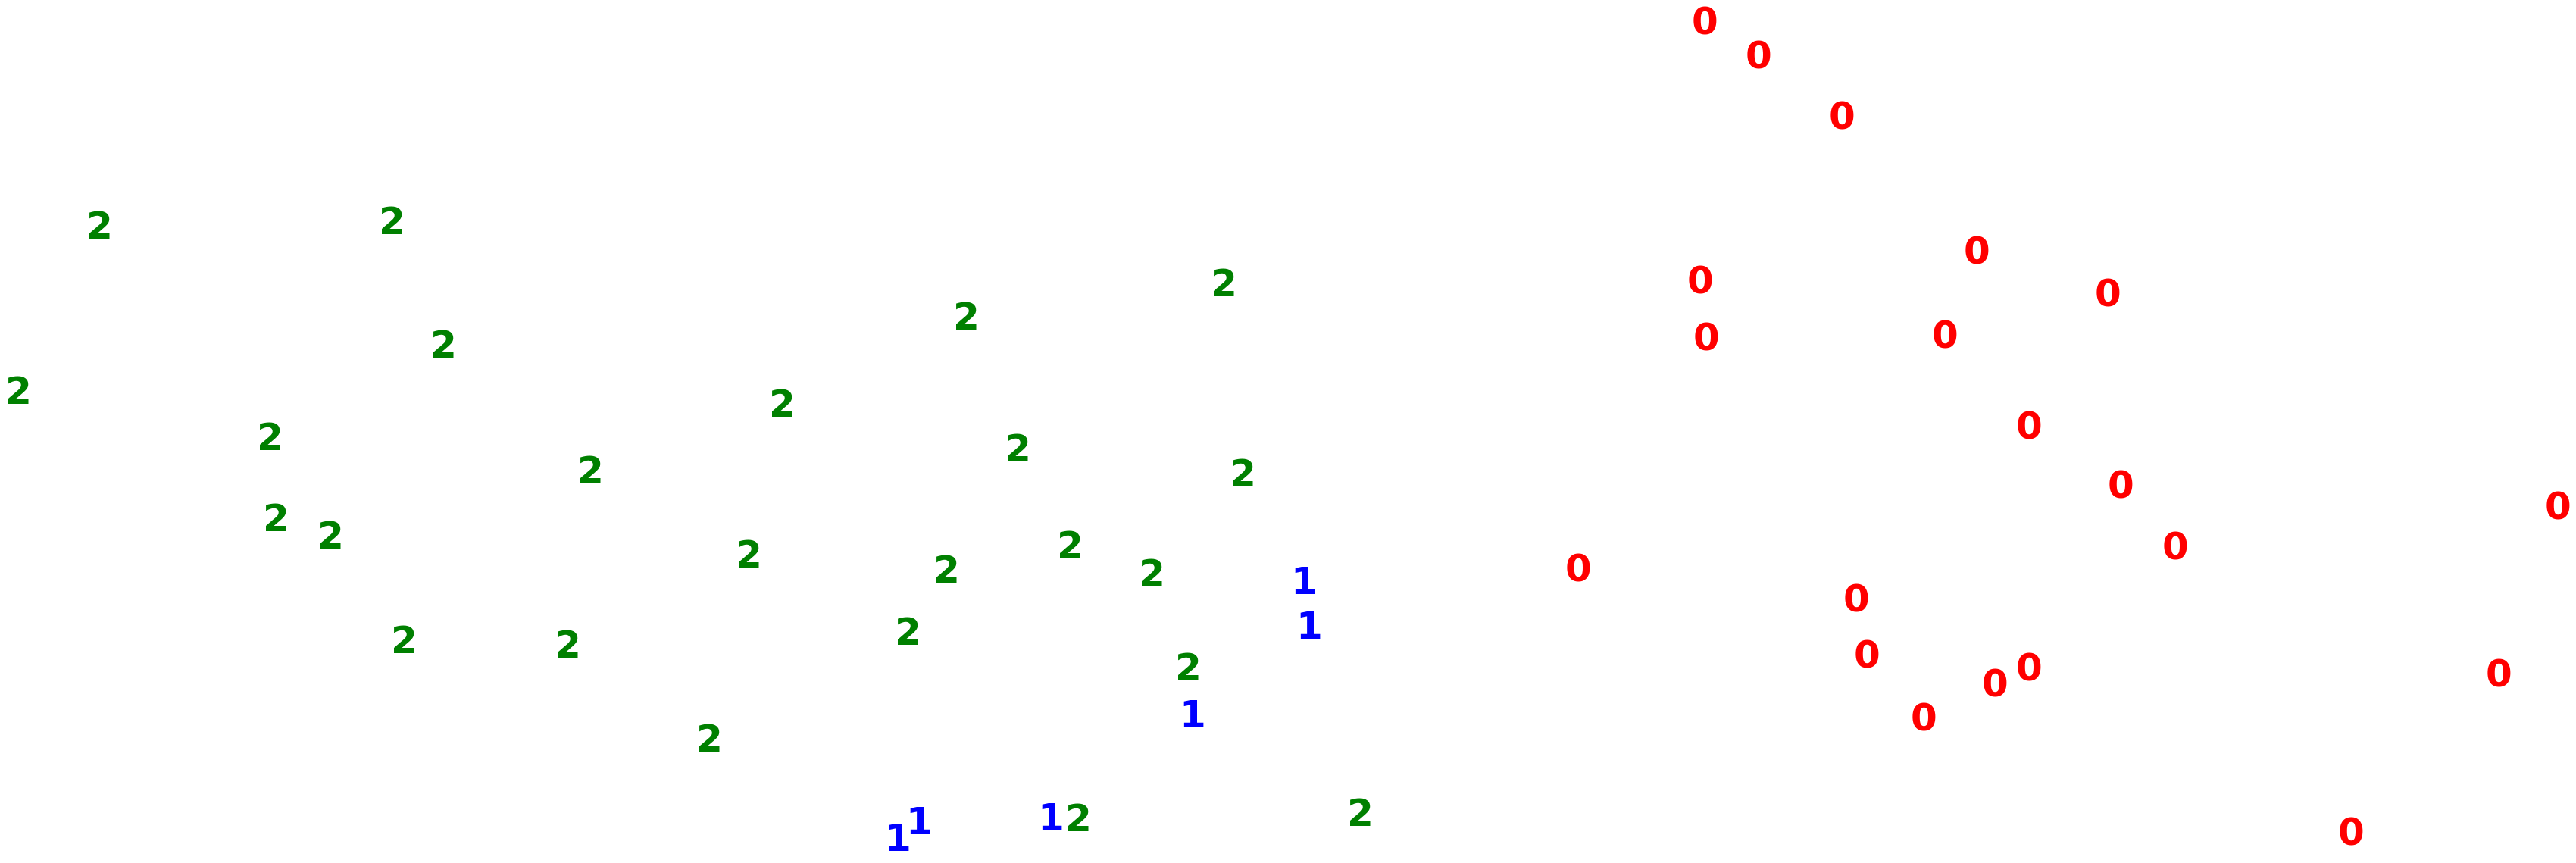

In [35]:
pca = PCA(n_components=2).fit_transform(df_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [37]:
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(df_std, clusters, metric='euclidean')))

GMM çözümünün siluet skoru                  : 0.213


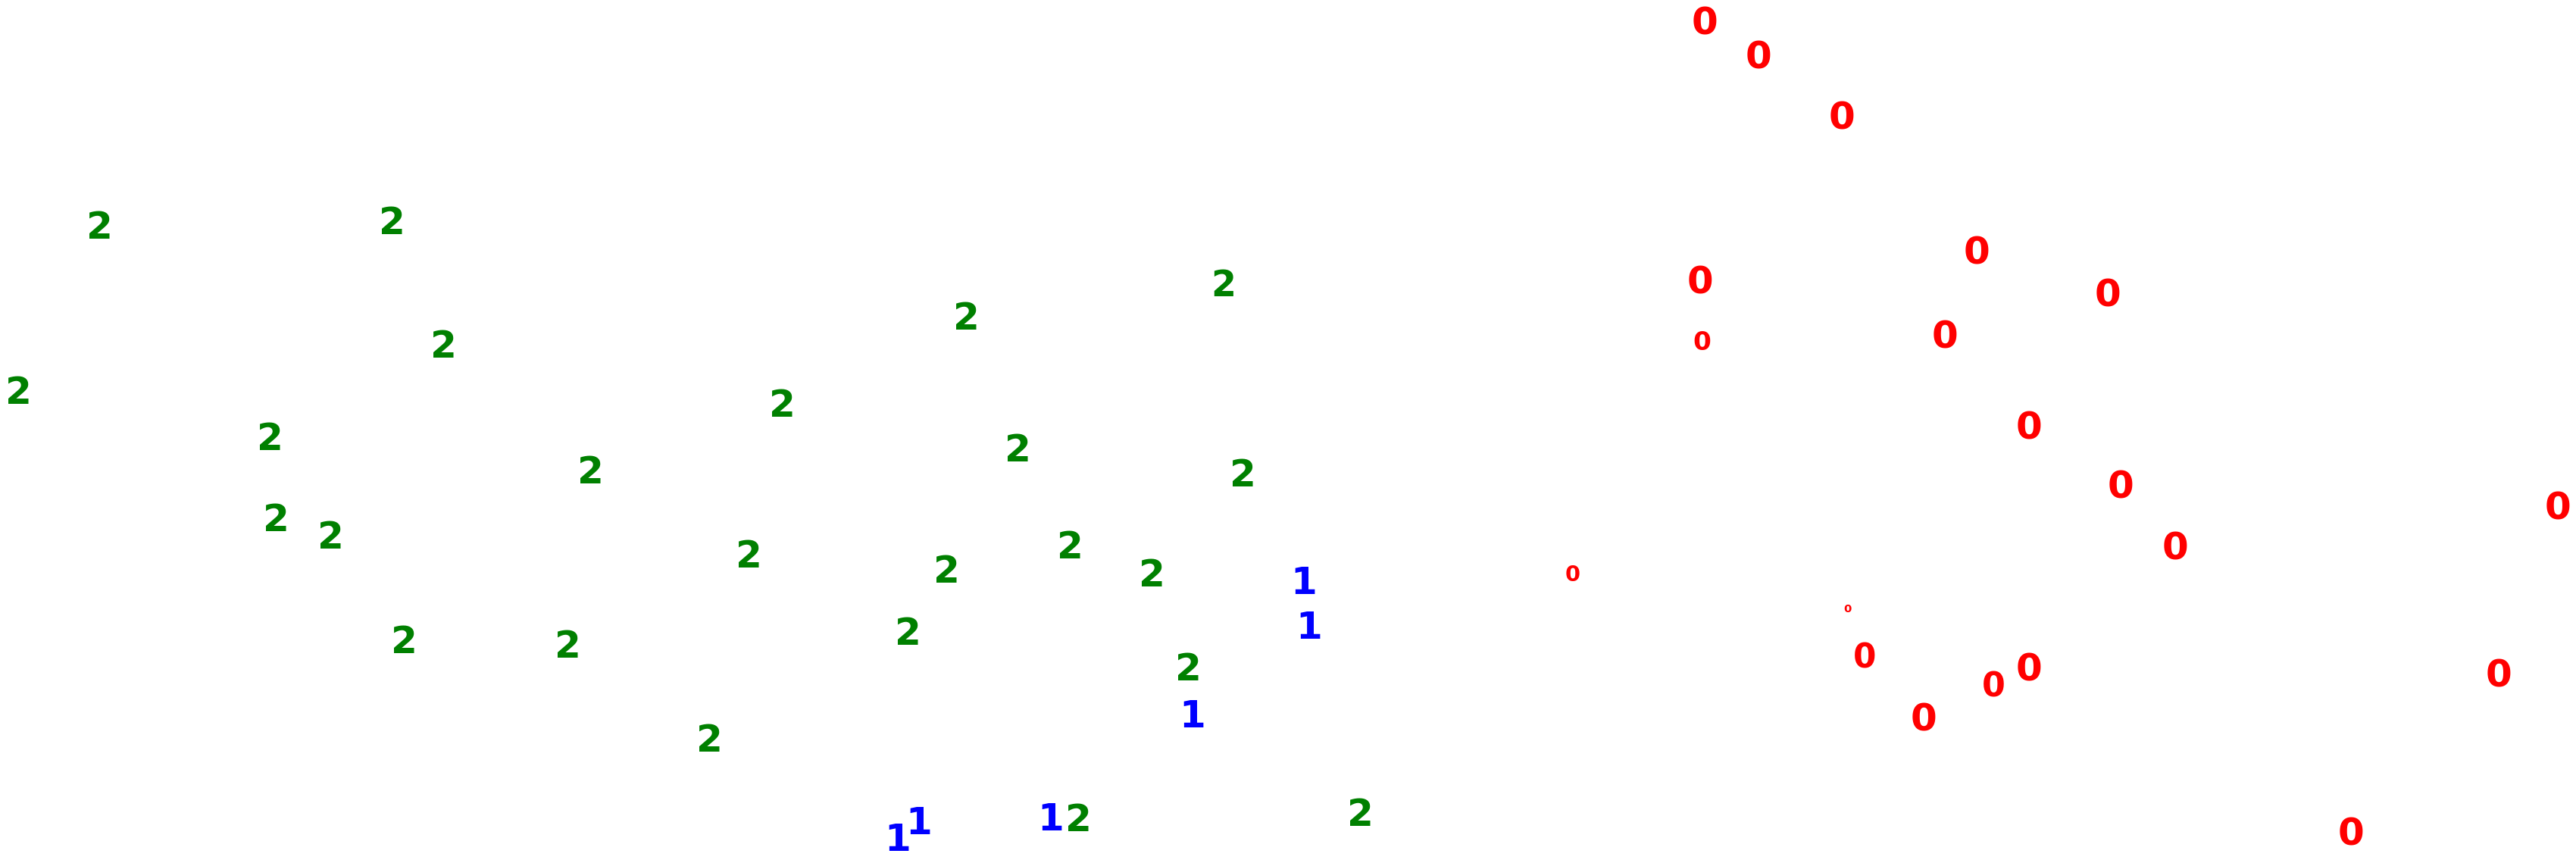

In [42]:
probs = gmm_cluster.predict_proba(df_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
